In [2]:
!ggrep -i mirlet7g ./../data/binfo1-datapack1/gencode.gtf

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


In [3]:
# samtools view options
# -b : output file format is 'bam' (binary version of file that contains sequenced reads mapped to reference genome)
#      (notice that you can't look into bam file visually since it is binary file)
# -o : designate output file name

# Mirlet7g gene starts at 106056039 and ends at 106056126

!samtools view -b -o ./../data/binfo1-datapack1/CLIP-let7g.bam ./../data/binfo1-datapack1/CLIP-35L33G.bam chr9:106056039-106056126
!samtools view ./../data/binfo1-datapack1/CLIP-let7g.bam | wc -l

     163


In [4]:
# samtools-mpileup output explanation
# ref : http://samtools.sourceforge.net/pileup.shtml
# col0 : which chromosome?
# col1 : 1-based coordinate
# col2 : reference base (if you didn't use FASTA file, then this will show up as 'N')
# col3 : number of reads covering the site
# col4 : read bases
# col5 : base quality scores

!samtools mpileup ./../data/binfo1-datapack1/CLIP-let7g.bam > ./../data/binfo1-datapack1/CLIP-let7g.pileup
!wc -l ./../data/binfo1-datapack1/CLIP-let7g.pileup; echo
!head ./../data/binfo1-datapack1/CLIP-let7g.pileup; echo
!tail ./../data/binfo1-datapack1/CLIP-let7g.pileup

[mpileup] 1 samples in 1 input files
   68548 ./../data/binfo1-datapack1/CLIP-let7g.pileup

chr9	106007092	N	9	^Ga^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia	<IFIGGHII
chr9	106007093	N	9	ggggggggg	AFGIEGDII
chr9	106007094	N	9	ccccccccc	EHHIGAFEH
chr9	106007095	N	9	aaaaaaaaa	?HDIFA>II
chr9	106007096	N	9	aaaaaaaaa	EHHIG@CHH
chr9	106007097	N	9	ttttttttt	=HGEGDFII
chr9	106007098	N	9	aaaaaaaaa	?HHIGDEII
chr9	106007099	N	9	g-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nn	?IEHGEDII
chr9	106007100	N	9	*********	8IBIBC@EI
chr9	106007101	N	9	*********	8IBIBC@EI

chr9	106075630	N	9	aaaaaaaaa	GIHIGGHII
chr9	106075631	N	9	ggggggggg	=IFIE?GII
chr9	106075632	N	9	ggggggggg	4HGIGCBHI
chr9	106075633	N	9	ggggggggg	<IFIDADIH
chr9	106075634	N	9	ccccccccc	?EEIDEGII
chr9	106075635	N	9	ttttttttt	:GGFECDII
chr9	106075636	N	9	ccccccccc	4IDIB?CGI
chr9	106075637	N	9	aaaaaaaaa	7IGIGBCGI
chr9	106075638	N	9	ttttttttt	7GGIGDEGI
chr9	106075639	N	9	t$t$t$t$t$t$t$t$t$	>IGFDDDGH


In [5]:
# filter out reads mapped between [106056039, 106056126]

!awk '$2 >= 106056039 && $2 <= 106056126 {print $0;}' ./../data/binfo1-datapack1/CLIP-let7g.pileup > ./../data/binfo1-datapack1/CLIP-let7g-gene.pileup
!head ./../data/binfo1-datapack1/CLIP-let7g-gene.pileup; echo
!tail ./../data/binfo1-datapack1/CLIP-let7g-gene.pileup

chr9	106056039	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056040	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056041	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056042	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056043	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056044	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056045	N	32	<<<<<<<<<^HT^DT^IT^GT^HT^HT^IT^GT^IT^HT^HT^IT^IT^HT^HT^GT^HT^GT^HT^HT^HT^IT^GT	BHEIG?DIIG9GEGGIDGEGFGBG;DDGHDGG
chr9	106056046	N	32	<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGGG	BHEIG?DIIG<GGGGIGGBGFG?G?GEGHHGG
chr9	106056047	N	32	<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAAA	BHEIG?DIIG7GEGGI8GHGCG=D4GE@GHGG
chr9	106056048	N	32	<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGGG	BHEIG?DIIG9GDGGIGGHEFGBG<GDGBHGG

chr9	106056117	N	138	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII:;HGIIDGGGIIBGEB?>H<GGIIIIDIIGFHIHH9IGG=GGHIDH?DGIBIIHHGGIEIGI8GIDHDG.GGHEDIIDIDGDHIDGIFGHG;DCDDHEE@I?CGG:IHGIBGIHIIDG@DHIGG
chr9	106056118	N	139	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC

In [6]:
import pandas as pd

pileup = pd.read_csv(
    './../data/binfo1-datapack1/CLIP-let7g-gene.pileup',
    sep='\t',
    names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals']
)

print(pileup.head(), '\n')
print(pileup.tail())

  chrom        pos _ref  count  basereads      quals
0  chr9  106056039    N      9  <<<<<<<<<  BHEIG?DII
1  chr9  106056040    N      9  <<<<<<<<<  BHEIG?DII
2  chr9  106056041    N      9  <<<<<<<<<  BHEIG?DII
3  chr9  106056042    N      9  <<<<<<<<<  BHEIG?DII
4  chr9  106056043    N      9  <<<<<<<<<  BHEIG?DII 

   chrom        pos _ref  count  \
83  chr9  106056122    N     88   
84  chr9  106056123    N     31   
85  chr9  106056124    N     31   
86  chr9  106056125    N     31   
87  chr9  106056126    N     30   

                                            basereads  \
83  <<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...   
84                    <<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC   
85                    <<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA   
86                    <<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG   
87                     <<<<<<<<<GGGGGGGGGGGGGGGGGGGGG   

                                                quals  
83  BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...  
84            

In [7]:
import re

removal = re.compile('[<>$*#^]')

# apply + lambda expression in python
# ref : https://wikidocs.net/46758

# create new column named 'matches'
pileup['matches'] = pileup['basereads'].apply(lambda x: removal.sub('', x))

In [8]:
print(pileup[['chrom', 'pos', 'matches']].head(), '\n')
print(pileup[['chrom', 'pos', 'matches']].tail())

  chrom        pos matches
0  chr9  106056039        
1  chr9  106056040        
2  chr9  106056041        
3  chr9  106056042        
4  chr9  106056043         

   chrom        pos                                            matches
83  chr9  106056122  CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
84  chr9  106056123                             CCCCCCCCCCCCCCCCCCCCCC
85  chr9  106056124                             AAAAAAAAAAAAAAAAAAAAAA
86  chr9  106056125                             GGGGGGGGGGGGGGGGGGGGGG
87  chr9  106056126                              GGGGGGGGGGGGGGGGGGGGG


In [9]:
print(
    pileup[pileup['pos'] == 106056094].iloc[0]
)

chrom                                                     chr9
pos                                                  106056094
_ref                                                         N
count                                                      126
basereads    <<<<<<<<<GGGGGGAAAAAAAAGGGGGAAAAAAGCCGCAGGATGA...
quals        BHEIG?DIIDIEHHCGHGIIEEHIHHGHIIIIG:AGGDH=HHIIII...
matches      GGGGGGAAAAAAAAGGGGGAAAAAAGCCGCAGGATGAGGTGATAAG...
Name: 55, dtype: object


In [10]:
print(
    pileup[pileup['pos'] == 106056094].iloc[0]['matches']
)

GGGGGGAAAAAAAAGGGGGAAAAAAGCCGCAGGATGAGGTGATAAGGGAGGGGTGAAGGGCGGTGAAGGGGAAAAGAGAAAGAAAAATAAAGGGGGAGTGGGAGGAAGAAGAGAATA


In [11]:
# copy data just in case
pileup_cp = pileup.copy()

In [35]:
# calculate shannon entropy (you may use built-in entropy function from scipy)
# ref : https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python

import numpy as np
import math

def seq2entropy(seq):

    blen = len(seq)
    if blen < 2: return 0

    bases, freqs = np.unique(list(seq), return_counts=True)
    probs = freqs / blen
    if np.count_nonzero(probs) < 2: return 0

    info = [-prob * math.log(prob, 2) for prob in probs]

    return sum(info)


In [37]:
# add entropy column
pileup['entropy'] = pileup['matches'].apply(seq2entropy)

print(pileup.head(), '\n')
print(pileup.tail(), '\n')
print(pileup[pileup['entropy'] > 0.0].head())

  chrom        pos _ref  count  basereads      quals matches  entropy
0  chr9  106056039    N      9  <<<<<<<<<  BHEIG?DII              0.0
1  chr9  106056040    N      9  <<<<<<<<<  BHEIG?DII              0.0
2  chr9  106056041    N      9  <<<<<<<<<  BHEIG?DII              0.0
3  chr9  106056042    N      9  <<<<<<<<<  BHEIG?DII              0.0
4  chr9  106056043    N      9  <<<<<<<<<  BHEIG?DII              0.0 

   chrom        pos _ref  count  \
83  chr9  106056122    N     88   
84  chr9  106056123    N     31   
85  chr9  106056124    N     31   
86  chr9  106056125    N     31   
87  chr9  106056126    N     30   

                                            basereads  \
83  <<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...   
84                    <<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC   
85                    <<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA   
86                    <<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG   
87                     <<<<<<<<<GGGGGGGGGGGGGGGGGGGGG   

                        

In [67]:
# create bedgraph output
# bedgraph format explain : https://genome.ucsc.edu/goldenPath/help/bedgraph.html
# 0-based, half open coordinates --> [start, end+1) --> (end+1) - start == read size

pileup_bed = pd.DataFrame(columns=['chrom', 'chromStart', 'chromEnd', 'dataValue'])
pileup_bed['chrom'] = pileup['chrom']
pileup_bed['chromStart'] = pileup['pos']
pileup_bed['chromEnd'] = pileup['pos'] + (pileup['basereads'].apply(len))
pileup_bed['dataValue'] = pileup['entropy']

print(pileup_bed.head(), '\n\n', pileup_bed.tail())
pileup_bed.to_csv('./../data/binfo1-datapack1/let7g-bedgraph.bedgraph', header=False, index=False, sep=' ')

  chrom  chromStart   chromEnd  dataValue
0  chr9   106056039  106056048        0.0
1  chr9   106056040  106056049        0.0
2  chr9   106056041  106056050        0.0
3  chr9   106056042  106056051        0.0
4  chr9   106056043  106056052        0.0 

    chrom  chromStart   chromEnd  dataValue
83  chr9   106056122  106056267        0.0
84  chr9   106056123  106056154        0.0
85  chr9   106056124  106056155        0.0
86  chr9   106056125  106056156        0.0
87  chr9   106056126  106056156        0.0


In [68]:
!gsed -i '1s/^/track type=bedGraph name="Mirlet7g" desciption="Mirlet7g BedGraph" visibility=full\n/' ./../data/binfo1-datapack1/let7g-bedgraph.bedgraph

!head ./../data/binfo1-datapack1/let7g-bedgraph.bedgraph

track type=bedGraph name="Mirlet7g" desciption="Mirlet7g BedGraph" visibility=full
chr9 106056039 106056048 0.0
chr9 106056040 106056049 0.0
chr9 106056041 106056050 0.0
chr9 106056042 106056051 0.0
chr9 106056043 106056052 0.0
chr9 106056044 106056053 0.0
chr9 106056045 106056123 1.8449730805551583
chr9 106056046 106056078 0.0
chr9 106056047 106056079 0.0


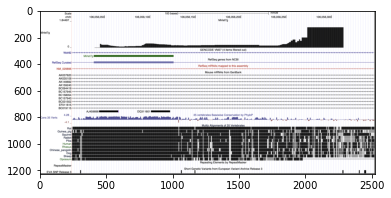

In [70]:
# show UCSC browser screenshot
# code ref : https://stackoverflow.com/questions/35286540/display-an-image-with-python

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('./../data/binfo1-datapack1/let7g_ucsc_screenshot.png')
imgplot = plt.imshow(img)
plt.show()

#### Automation

In [ ]:
import subprocess

def read_entropy(gene_name, pos_start, pos_end):

#### Mirlet7g

In [73]:
!ggrep -i mirlet7g ./../data/binfo1-datapack1/gencode.gtf

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


#### Mirlet7d

In [71]:
!ggrep -i mirlet7d ./../data/binfo1-datapack1/gencode.gtf

chr13	ENSEMBL	gene	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; gene_type "miRNA"; gene_name "Mirlet7d"; level 3; mgi_id "MGI:2676796";
chr13	ENSEMBL	transcript	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";
chr13	ENSEMBL	exon	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; exon_number 1; exon_id "ENSMUSE00000522678.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";


#### Mirlet7f-1

In [72]:
!ggrep -i mirlet7f-1 ./../data/binfo1-datapack1/gencode.gtf

chr13	ENSEMBL	gene	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; level 3; mgi_id "MGI:2676798";
chr13	ENSEMBL	transcript	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";
chr13	ENSEMBL	exon	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; exon_number 1; exon_id "ENSMUSE00001348852.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";
